In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
# error bars from website
table_data = [2] + [3]*8 + [2]
table_data = np.repeat(table_data, 10)

To get a normal approximation, I use the formulas for the mean and variance of a binomial distribution, rescaled to show error in percentage points.

In [3]:
# my formula for error bars
n = 1000
p = np.linspace(0, 1, 100)
err = 196*(n*p*(1-p))**0.5/n

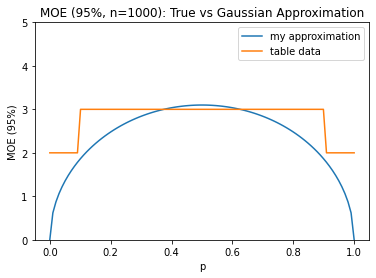

In [4]:
plt.title(f"MOE (95%, n={n}): True vs Gaussian Approximation")
plt.plot(p, err, label="my approximation")
plt.plot(p, table_data, label="table data")
plt.ylabel("MOE (95%)")
plt.xlabel("p")
plt.ylim(0, 5)
plt.legend()
plt.show()

In [5]:
errs = pd.DataFrame()
s = 10
errs["p"] = np.round(p[::s], 1)
errs["true"] = table_data[::s]
errs["approx (rounded)"] = np.round(err[::s])
errs["correct?"] = errs.true == errs["approx (rounded)"]
errs["approx (exact)"] = err[::s]

errs

,p,true,approx (rounded),correct?,approx (exact)
0,0.0,2,0.0,False,0.000000
1,0.1,3,2.0,False,1.867738
2,0.2,3,2.0,False,2.488567
3,0.3,3,3.0,True,2.848433
4,0.4,3,3.0,True,3.041423
5,0.5,3,3.0,True,3.098874
6,0.6,3,3.0,True,3.028509
7,0.7,3,3.0,True,2.820778
8,0.8,3,2.0,False,2.440859
9,0.9,2,2.0,True,1.781818


My approximation breaks down at the tails, when $p$ is very small or very large. This is because the normal is a badd approximation to the binomial at these values. See a visualization of this effect below. At low values of $p$, the binomial becomes very blocky, making it less amenable to the smooth approximation of the normal. (Note the x-axis is scaled to show the relevant region.)

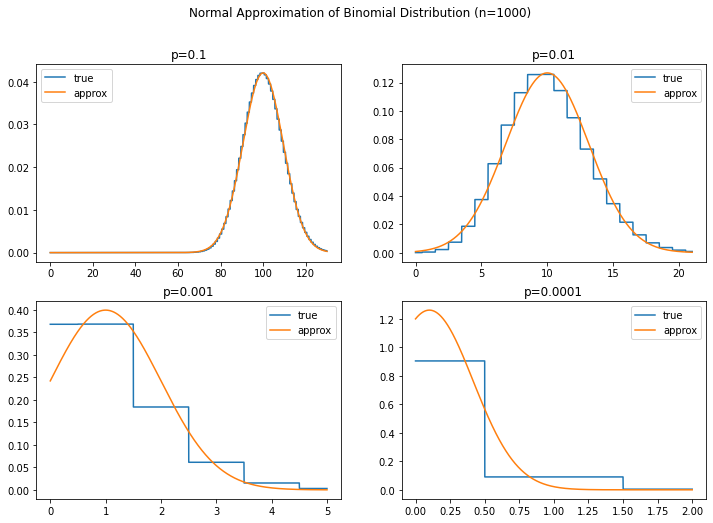

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = iter(axes.flatten())

for q in [0.1, 0.01, 0.001, 0.0001]:
    ax = next(axes)
    true = stats.binom(n=n, p=q)
    approx = stats.norm(loc=true.mean(), scale=true.std())
    k = np.linspace(0, true.ppf(0.999), 10000)
    ax.plot(k, true.pmf(np.round(k)), label="true")
    ax.plot(k, approx.pdf(k), label="approx")
    ax.legend()
    ax.set_title(f"p={q}")
fig.suptitle(f"Normal Approximation of Binomial Distribution (n={n})")
plt.show()

Frankly, I'm a little confused about why we're using a binomial here. Binomial should be the likelihood, right? Then use a beta prior? So, we should be doing a credible interval on the posterior over $p$, which is beta?

The reason we are using a binomial likelihood is that we are assuming that poll responses are independent, and that there is some true parameter $p$ which determines whether each responder is a yes-responder or a no-responder.